In [2]:
import lightkurve as lk
from lightkurve import search_targetpixelfile
tpf = search_targetpixelfile('212136544', mission='K2', campaign= 18).download()

In [3]:
tpf

KeplerTargetPixelFile Object (ID: 212136544)

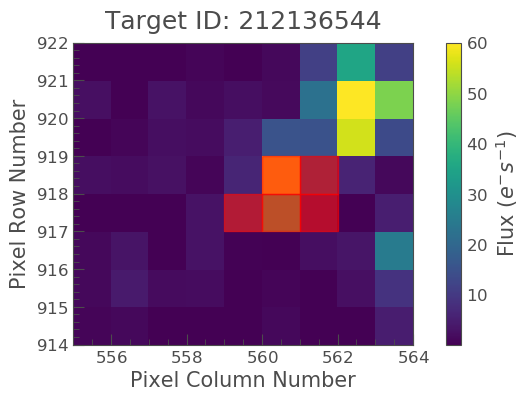

In [4]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask, mask_color='red')

(0.9, 1.1)

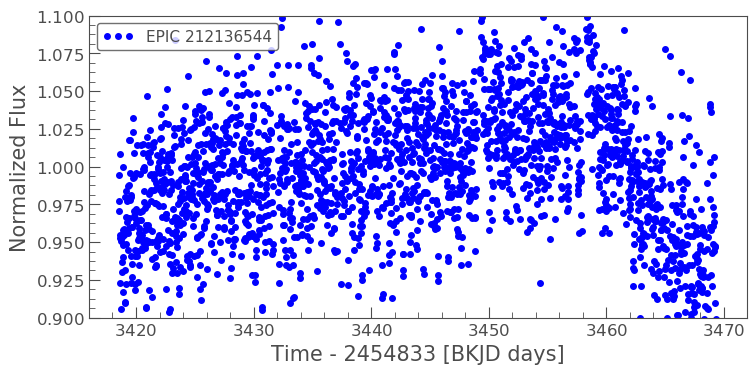

In [5]:
import matplotlib.pyplot as plt

user_lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
plt.ylim(0.9,1.1)

In [6]:
#user_lc.errorbar();

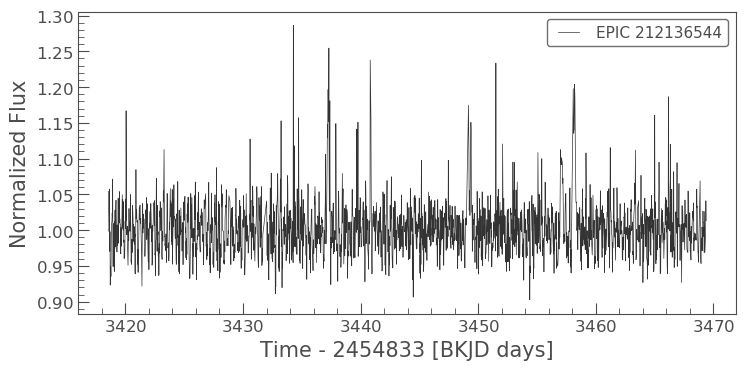

In [7]:
corrector = lk.correctors.SFFCorrector(user_lc)
new_lc_sff = corrector.correct(user_lc.centroid_col,user_lc.centroid_row)

new_lc_sff.plot()

/anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:463: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


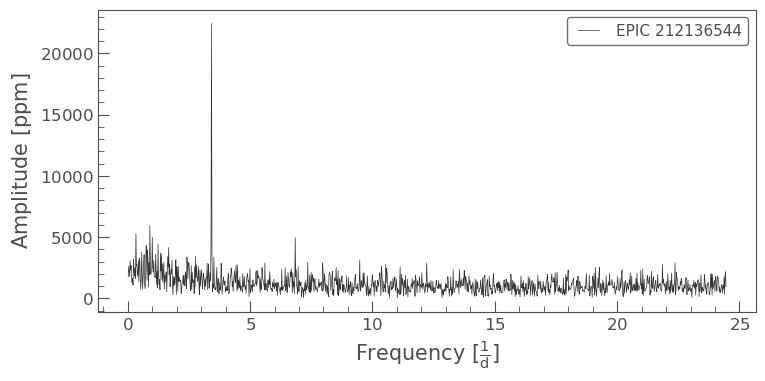

In [8]:
pg_sff = new_lc_sff.to_periodogram(oversample_factor=1)
pg_sff.plot()

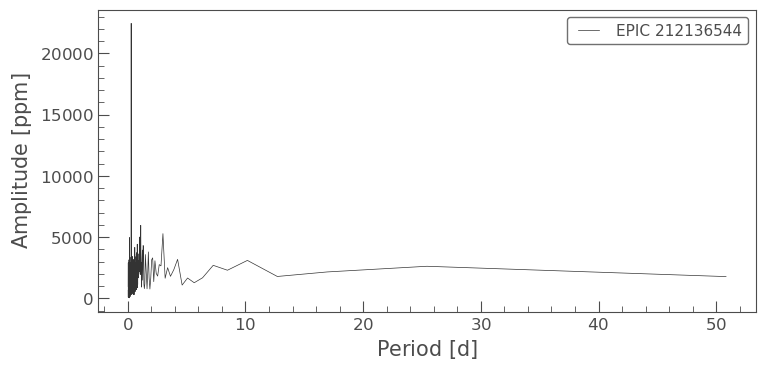

In [9]:
pg_sff.plot(view='period')

Best period: 0.2921512083239681 d


(0.9, 1.1)

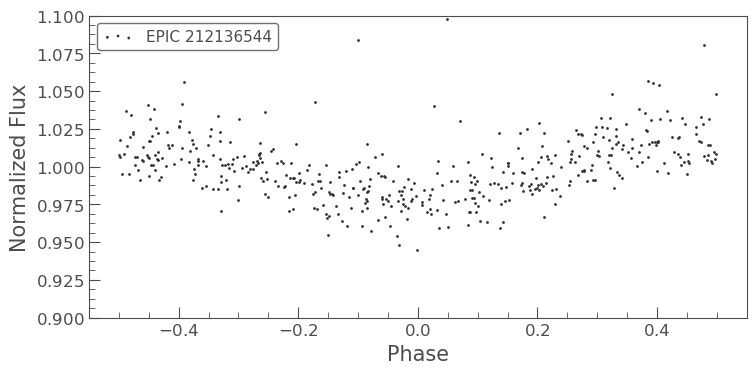

In [23]:
period = pg_sff.period_at_max_power
print('Best period: {}'.format(period))
binned_lc=new_lc_sff.bin(binsize=5)
binned_lc.fold(period.value).scatter();
plt.ylim(0.9,1.1)

In [ ]:
period = pg_sff.period_at_max_power * 4
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();

In [ ]:
import astropy.units as u
pg_sff = new_lc_sff.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)

In [ ]:
period = pg_sff.period_at_max_power
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();